In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os

File descriptions (from https://www.kaggle.com/competitions/big-data-derby-2022/data)

    nyra_start_table.csv - horse/jockey race data
    nyra_race_table.csv - racetrack race data
    nyra_tracking_table.csv - tracking data
    nyra_2019_complete.csv - combined table of three above files


In [7]:

main_path = '/home/pedro/Desktop/Data projects/nyra_2019_complete.csv'

df = pd.read_csv(main_path)
# List of column names 
column_names = ['track_id', 'race_date', 'race_number', 'program_number', 
                'trakus_index', 'latitude', 'longitude', 'distance_id', 
                'course_type', 'track_condition', 'run_up_distance', 'race_type', 
                'post_time', 'weight_carried', 'jockey', 'odds', 'position_at_finish']


#Noticed that there was an extra column in the complete data. 
# After further analysis, the 13 column was deleted because it looked like the extra/fake one (if someone has factual information on this, please report) 

# Drop the column 13
df = df.drop(df.columns[13], axis=1)
df.columns = column_names
df['race_id'] = df['race_number'].astype(str) + df['race_date'].astype(str)
df.head()

/tmp/ipykernel_4812/213226133.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(main_path)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,post_time,weight_carried,jockey,odds,position_at_finish,race_id
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,120,Andre Shivnarine Worrie,2090,8,92019-01-01
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,120,Andre Shivnarine Worrie,2090,8,92019-01-01
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,120,Andre Shivnarine Worrie,2090,8,92019-01-01
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,120,Andre Shivnarine Worrie,2090,8,92019-01-01
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,120,Andre Shivnarine Worrie,2090,8,92019-01-01


In [8]:
# Remove duplicate rows based on "race_id" and "player_name"
df_per_race = df.drop_duplicates(subset=['race_id', 'jockey'])

unique_count = df_per_race['race_id'].value_counts()
#print(f"Number of unique elements in : {unique_count}")


Visualization of the data (trying to get insights into tendencies, as well as data properties and relationships)

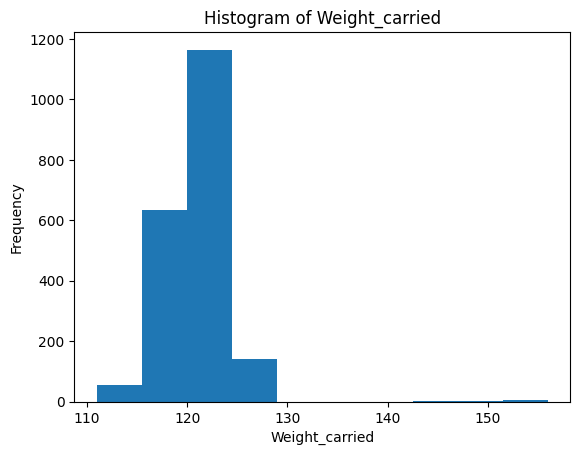

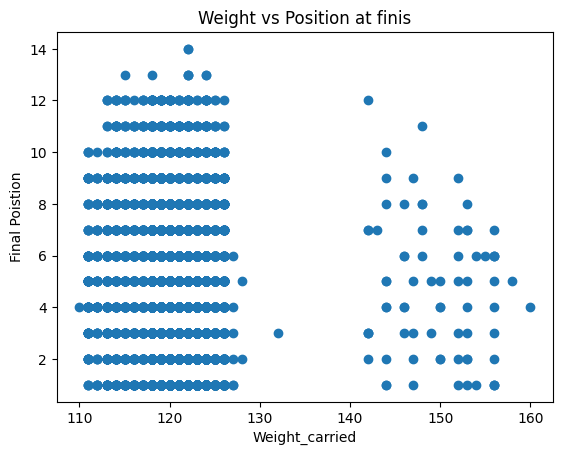

In [9]:
df_per_race_winners = df_per_race[df_per_race['position_at_finish'] == 1]
plt.hist(df_per_race_winners['weight_carried'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Weight_carried')
plt.ylabel('Frequency')
plt.title(f'Histogram of Weight_carried')
plt.show()

plt.scatter(df_per_race['weight_carried'], (df_per_race['position_at_finish'])  )  # Adjust the number of bins as needed
plt.xlabel('Weight_carried')
plt.ylabel('Final Poistion')
plt.title(f'Weight vs Position at finis')
plt.show()
